# Pallavi Yenigalla 2611733530

# 2. (Deep) CNNs for Image Colorization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
#import cv
from keras.models import Sequential, load_model, Model
from keras.layers import Reshape,Input, Dense,BatchNormalization, Activation, LeakyReLU, add,Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import SGD
from keras import regularizers
from keras.optimizers import Adam,SGD
opt = Adam(lr=0.1)
import keras
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation

#### (a) This assignment uses a convolutional neural network for image colorization which turns a grayscale image to a colored image.4 By converting an image to grayscale, we loose color information, so converting a grayscale image back to a colored version is not an easy job. We will use the CIFAR-10 dataset. Downolad the dataset from http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz.

In [9]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

#### (b) From the train and test dataset, extract the class birds. We will focus on this class, which has 6000 members.

#### Extracting the class birds from train and test set and concatenating them respectively to get size 6000

In [13]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
z=y_train
i,j = np.where(z==2)
print(i)
i.size

[    6    13    18 ..., 49987 49991 49995]


5000

In [14]:
m=y_test
q,j=np.where(m==2)
#print(q)
q.size

1000

In [15]:
d=x_train[i]
print(d.shape)


(5000, 32, 32, 3)


In [16]:
e=x_test[q]
print(e.shape)

(1000, 32, 32, 3)


#### class birds is stored in b 


In [17]:
b=np.concatenate([d,e])
b.shape

(6000, 32, 32, 3)

#### (c) Those 6000 images have 6000 × 32 × 32 pixels. Choose at least 10% of the pixelscrandomly. It is strongly recommended that you choose a large number or all of the pixels. You will have between P = 614400 and P = 6144000 pixels. Each pixel is an RGB vector with three elements.


#### The entire pixels have been used in which each pixel is an RGB vector.

In [18]:

c=b.reshape(6144000,3)
c.size

18432000

#### (d) Run k-means clustering on the P vectors using k = 4. The centers of the clusters will be your main colors. Convert the colored images to k-color images by converting each pixel’s value to the closest main color in terms of Euclidean distance. These are the outputs of your network, whose each pixel falls in one of those k classes.

#### Kmeans clustering has been done using k=4. The cluster values have been changed to the closest main colour that has been evaluated by the clustering procedure using Eucledean distance.

In [19]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=0).fit(c)
clusters=kmeans.labels_




In [20]:
kmeans.predict(c)
print(kmeans.cluster_centers_)
clusters=kmeans.labels_
index0=np.argwhere(clusters == 0)
index1 = np.argwhere(clusters == 1)
index2 = np.argwhere(clusters == 2)
index3 = np.argwhere(clusters == 3)


[[ 108.97036568  108.60691289   82.66458238]
 [ 206.53651167  211.77549799  211.39857871]
 [ 156.18468173  155.51640472  135.57285659]
 [  49.02965771   50.01208333   38.57034319]]


In [21]:
c[index0]=kmeans.cluster_centers_[0]
c[index1]=kmeans.cluster_centers_[1]
c[index2]=kmeans.cluster_centers_[2]
c[index3]=kmeans.cluster_centers_[3]


In [22]:
c=c.reshape(6000,3072)

#### (e) Use any tool (e.g., openCV or scikit-learn) to obtain grayscale 32 × 32 × 1 images from the original 32 × 32 × 3 images. The grayscale images are inputs of your network.


In [23]:
from skimage.color import rgb2gray
img_gray = rgb2gray(b)


In [24]:
img1=img_gray.reshape((6000,32,32,1))
img1.shape

(6000, 32, 32, 1)

In [29]:
plt.imshow(img1[0].reshape(32,32))


#### The gray scale inputs are now ready.

####  (f) Set up a deep convolutional neural network with two convolution layers and two MLP layers with. Use 5 × 5 filters and a softmax layer. Determine the number of filters, strides, and whether or not to use padding yourself. Use a minimum of one max pooling layer. Your input is a grayscale version of an image (32×32×1) and the output is a 32×32×3 image that is colored using the main colors. Use a classification scheme, which means your output must determine one of the k color classes for each pixel in your grayscale image. Train at least for 5 epochs. Plot training, (validation), and test errors in each epoch. Report the train and test errors and visually compare the artificially colored versions of the first 10 images in the test set with the original images.

In [36]:
model=Sequential()
model.add(Conv2D(32,strides=1, kernel_size=(5, 5), input_shape=(32, 32,1), padding='same', activation='softmax'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='same'))
model.add(Conv2D(64,strides=(5,5), kernel_size=(5, 5), padding='same', activation='softmax'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(5000,activation='relu',kernel_initializer='RandomUniform'))
model.add(Dense(3072,activation='relu'))
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mean_squared_error'])
history = model.fit(img1, c, batch_size=64, epochs=5, verbose=1, shuffle=True,validation_split=0.1)
model.save_weights('model.h5')


Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 230s 43ms/step - loss: 9778.2700 - val_loss: 8450.5405
Epoch 2/5
5400/5400 [==============================] - 225s 42ms/step - loss: 8221.9521 - val_loss: 8500.7683
Epoch 3/5
5400/5400 [==============================] - 222s 41ms/step - loss: 8215.6843 - val_loss: 8301.2826
Epoch 4/5
5400/5400 [==============================] - 222s 41ms/step - loss: 8207.4115 - val_loss: 8341.0809
Epoch 5/5
5400/5400 [==============================] - 124s 23ms/step - loss: 8203.3581 - val_loss: 8375.3206


#### Training and test errors have been plotted.

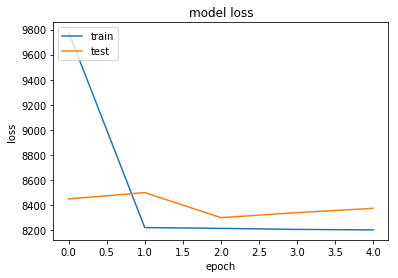

In [37]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()